<a href="https://colab.research.google.com/github/dla9944/myPyCode/blob/main/Natural_Language_Processing_spam_mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# 스팸메일 분류를 위한 자연어 처리(나이브베이즈_다항분류기)
# 라이브러리 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk

In [3]:
# 파일 로드
mail = pd.read_csv('spam.csv')
mail

,Unnamed: 0,target,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5569,5569,spam,This is the 2nd time we have tried 2 contact u...
5570,5570,ham,Will ü b going to esplanade fr home?
5571,5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,5572,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Unnamed: 0 이라는 feature 제거
mail = pd.read_csv('spam.csv', index_col = 0)
mail

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [5]:
# 데이터 개략적 확인중
mail.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [7]:
# 문자수 확인
mail.describe()

# target이 spam과 ham을 분류한 것이고, text가 실제 메일내용

,target,text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [8]:
# 시각화

mail.target.value_counts()

ham     4827
spam     747
Name: target, dtype: int64

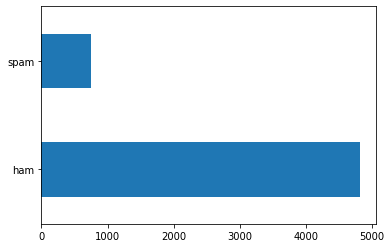

In [10]:
mail.target.value_counts().plot(kind='barh')

In [11]:
# 데이터 비율

mail.target.value_counts()/len(mail.target)

ham     0.865985
spam    0.134015
Name: target, dtype: float64

In [30]:
mail.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [31]:
# 데이터 전처리 시작

mail.text[0].split() # 띄어쓰기별 분리

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...']

In [32]:
# 특수기호를 보여주는 패키지 호출

from string import punctuation

In [33]:
# 특수기호 모음
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
first_text = mail.loc[0, 'text']
first_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [36]:
# 원본 데이터 보호를 위한 카피

mail2 = mail.copy()
mail2

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [37]:
new_text = ''
for c in first_text:
  if c not in punctuation:
    new_text += c
new_text = ''.join(new_text)
new_text

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [38]:
# 특수기호 삭제하는 함수 저장

def remove (old_text: str):
  new_text=''
  for c in old_text:
    if c not in punctuation:
      new_text += c
  return new_text

In [39]:
remove(first_text)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [61]:
# apply 구문 활용

mail.text = mail.text.apply(remove)
mail.text

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [55]:
mail

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home
5571,ham,Pity was in mood for that Soany other suggest...
5572,ham,The guy did some bitching but I acted like id ...


In [29]:
mail = mail2

In [43]:
# 불용어 삭제

import nltk


In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords') # 오류시 사용

In [48]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
# 불용어 정의
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
# split으로 문장을 공백 기준으로 분리

split = first_text.split()
split

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...']

In [58]:
# 전체 문자열 소문자로 수정

for word in split:
  lower = word.lower()
  if lower not in stop_words:
    print(lower)

go
jurong
point,
crazy..
available
bugis
n
great
world
la
e
buffet...
cine
got
amore
wat...


In [62]:
# 전체 함수로 재생성

def remove_stop_words(text):
  new_text = []
  for word in first_text.split():
    lower = word.lower()
  if lower not in stop_words:
    new_text.append(lower)
    return " ".join(new_text)

In [63]:
remove_stop_words(new_text)

'wat...'

In [65]:
mail.target.value_counts()

ham     4827
spam     747
Name: target, dtype: int64

In [66]:
# .get_dummies로 mail의 더미 데이터인 target_spam 생성 후 원래 행 삭제
pd.get_dummies(mail, columns=['target'], drop_first=True)

,text,target_spam
0,Go until jurong point crazy Available only in ...,0
1,Ok lar Joking wif u oni,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor U c already then say,0
4,Nah I dont think he goes to usf he lives aroun...,0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home,0
5571,Pity was in mood for that Soany other suggest...,0
5572,The guy did some bitching but I acted like id ...,0


In [67]:
# .map을 통해 종속변수로 조정
mail.target = mail.target.map({'spam':1, 'ham' :0})
mail.target # X

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

In [68]:
mail.text # 독립변수

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [73]:
# CountVectorizer는 .feature_extraction.text 에서 호출

from sklearn.feature_extraction.text import CountVectorizer


X = mail.text
y = mail.target

In [74]:
# 벡터라이저 정의
cv = CountVectorizer()
cv.fit(X)

CountVectorizer()

In [75]:
# 단어장 반환
cv.vocabulary_

{'go': 3822,
 'until': 8779,
 'jurong': 4734,
 'point': 6501,
 'crazy': 2518,
 'available': 1427,
 'only': 6094,
 'in': 4444,
 'bugis': 1901,
 'great': 3919,
 'world': 9288,
 'la': 4895,
 'buffet': 1899,
 'cine': 2235,
 'there': 8352,
 'got': 3879,
 'amore': 1188,
 'wat': 9040,
 'ok': 6054,
 'lar': 4934,
 'joking': 4702,
 'wif': 9180,
 'oni': 6088,
 'free': 3606,
 'entry': 3188,
 'wkly': 9239,
 'comp': 2351,
 'to': 8477,
 'win': 9195,
 'fa': 3324,
 'cup': 2574,
 'final': 3450,
 'tkts': 8466,
 '21st': 454,
 'may': 5384,
 '2005': 441,
 'text': 8291,
 '87121': 875,
 'receive': 6901,
 'questionstd': 6792,
 'txt': 8680,
 'ratetcs': 6844,
 'apply': 1277,
 '08452810075over18s': 71,
 'dun': 3037,
 'say': 7261,
 'so': 7682,
 'early': 3059,
 'hor': 4263,
 'already': 1160,
 'then': 8346,
 'nah': 5736,
 'dont': 2943,
 'think': 8374,
 'he': 4077,
 'goes': 3836,
 'usf': 8832,
 'lives': 5098,
 'around': 1329,
 'here': 4137,
 'though': 8395,
 'freemsg': 3614,
 'hey': 4156,
 'darling': 2638,
 'its': 46

In [76]:
# 독립변수 변환
X = cv.transform(X)
X

<5574x9544 sparse matrix of type '<class 'numpy.int64'>'
	with 72798 stored elements in Compressed Sparse Row format>

In [77]:
print(X)

  (0, 1188)	1
  (0, 1427)	1
  (0, 1899)	1
  (0, 1901)	1
  (0, 2235)	1
  (0, 2518)	1
  (0, 3822)	1
  (0, 3879)	1
  (0, 3919)	1
  (0, 4444)	1
  (0, 4734)	1
  (0, 4895)	1
  (0, 6094)	1
  (0, 6501)	1
  (0, 8352)	1
  (0, 8779)	1
  (0, 9040)	1
  (0, 9288)	1
  (1, 4702)	1
  (1, 4934)	1
  (1, 6054)	1
  (1, 6088)	1
  (1, 9180)	1
  (2, 71)	1
  (2, 441)	1
  :	:
  (5572, 1937)	1
  (5572, 2814)	1
  (5572, 3131)	1
  (5572, 3555)	1
  (5572, 3606)	1
  (5572, 3732)	1
  (5572, 3981)	1
  (5572, 4077)	1
  (5572, 4385)	1
  (5572, 4444)	1
  (5572, 4524)	1
  (5572, 4585)	1
  (5572, 5048)	1
  (5572, 5831)	1
  (5572, 7698)	1
  (5572, 7709)	1
  (5572, 8329)	1
  (5572, 8477)	1
  (5572, 8822)	1
  (5572, 9090)	1
  (5573, 4606)	2
  (5573, 5742)	1
  (5573, 7120)	1
  (5573, 8477)	1
  (5573, 8626)	1


In [79]:
# 훈련셋, 시험셋 분리 시작

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [80]:
# 나이브 베이즈모델 호출

from sklearn.naive_bayes import MultinomialNB

In [82]:
nb = MultinomialNB()

In [83]:
# 훈련
nb.fit(X_train, y_train)

MultinomialNB()

In [84]:
# 예측 지정 pred
pred = nb.predict(X_test)

In [85]:
# 예측
pred

array([0, 1, 1, ..., 0, 0, 0])

In [89]:
# 점수 평가

from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test, pred)

0.9796772265391512

In [91]:
# 혼동값 행렬 생성

#confusion_matrix 패키지를 .metrics에서 호출

from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test, pred)

array([[1437,   18],
       [  16,  202]])

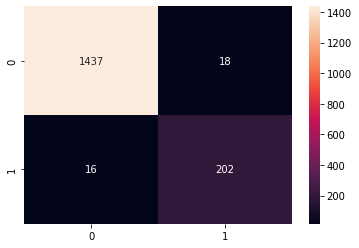

In [98]:
# 시각화

sns.heatmap(confusion_matrix(y_test, pred), vmax = 1437, vmin = 16, annot = True, fmt='.0f')

Text(33.0, 0.5, 'True')

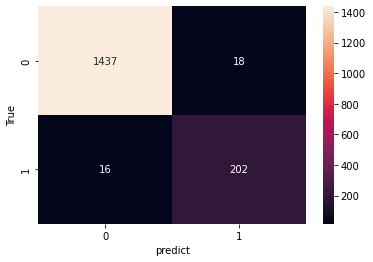

In [99]:
# 시각화

sns.heatmap(confusion_matrix(y_test, pred), vmax = 1437, vmin = 16, annot = True, fmt='.0f')
plt.xlabel('predict')
plt.ylabel('True')